# 0.0 IMPORTS

In [45]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

import inflection

from IPython.display import Image
from IPython.display import HTML

## 0.1 Helper Functions

In [62]:
def jupyter_settings():
  
    %matplotlib inline
    %pylab inline
  
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25,12]
    plt.rcParams['font.size'] = 24
  
    display( HTML( '<style>.container { width: 100% !important; }</style>' ) )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.options.display.float_format = '{:.4f}'.format
    pd.set_option( 'display.expand_frame_repr', False )
  
    sb.set()

In [63]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2 Loading Data

In [61]:
df_raw = pd.read_csv('data/churn.csv')
df_raw = df_raw.drop(['RowNumber'], axis=1)

# 1.0 DATA DESCRIPTION

In [55]:
df1 = df_raw.copy()

## 1.1 Rename Columns

In [56]:
old_columns = df1.columns

snakecase = lambda x: inflection.underscore(x)

new_columns = list( map(snakecase, old_columns) )

#rename
df1.columns = new_columns

## 1.2 Data Dimensions

In [57]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 10000
Number of columns: 13


## 1.3 Data Types

In [58]:
df1.dtypes

customer_id           int64
surname              object
credit_score          int64
geography            object
gender               object
age                   int64
tenure                int64
balance             float64
num_of_products       int64
has_cr_card           int64
is_active_member      int64
estimated_salary    float64
exited                int64
dtype: object

## 1.4 Check NA

In [40]:
df1.isna().sum()

customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

## 1.5 Descriptive Statistical

In [41]:
# select numerical columns
num_attributes = df1.select_dtypes(include=['int64', 'float64'])

# select categorical columns
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64'])

### 1.5.1 Numerical Attributes

In [52]:
# Central Tendency - Mean, Median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - Std, Min, Max, Range, Skew, Kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# Concatenate
metrics = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
metrics.columns = ( ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis'] )

In [64]:
metrics

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,customer_id,15565701.0000,15815690.0000,249989.0000,15690940.5694,15690738.0000,71932.5892,0.0011,-1.1961
1,credit_score,350.0000,850.0000,500.0000,650.5288,652.0000,96.6485,-0.0716,-0.4257
2,age,18.0000,92.0000,74.0000,38.9218,37.0000,10.4873,1.0113,1.3953
3,tenure,0.0000,10.0000,10.0000,5.0128,5.0000,2.8920,0.0110,-1.1652
4,balance,0.0000,250898.0900,250898.0900,76485.8893,97198.5400,62394.2853,-0.1411,-1.4894
5,num_of_products,1.0000,4.0000,3.0000,1.5302,1.0000,0.5816,0.7456,0.5830
6,has_cr_card,0.0000,1.0000,1.0000,0.7055,1.0000,0.4558,-0.9018,-1.1870
7,is_active_member,0.0000,1.0000,1.0000,0.5151,1.0000,0.4998,-0.0604,-1.9967
8,estimated_salary,11.5800,199992.4800,199980.9000,100090.2399,100193.9150,57507.6172,0.0021,-1.1815
9,exited,0.0000,1.0000,1.0000,0.2037,0.0000,0.4027,1.4716,0.1657


### 1.5.2 Categorial Attributes

In [65]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

surname      2932
geography       3
gender          2
dtype: int64

In [81]:
# Customers that churn
aux1 = df1[df1['exited'] == 0]

# Customers that don't churn
aux2 = df1[df1['exited'] == 1]

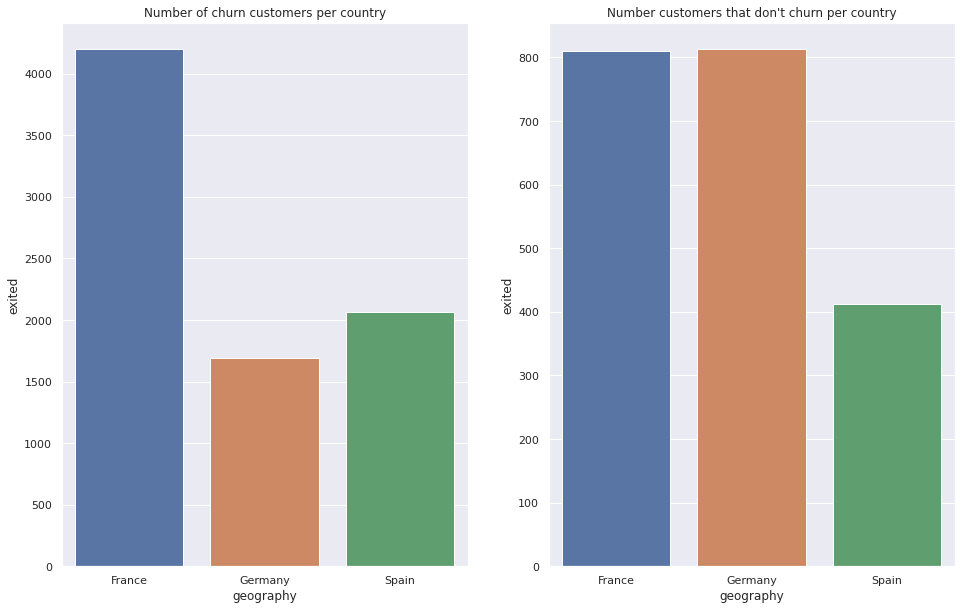

In [105]:
# Number of churn customers per country
churn_per_country = aux1[['geography', 'exited']].groupby('geography').count().reset_index()
plt.figure( figsize=(16,10) )
plt.subplot(1,2,1)
sb.barplot(x='geography',y='exited', data=churn_per_country);
plt.title('Number of churn customers per country');

# Number customers that don't churn per country
dont_churn_per_country = aux2[['geography', 'exited']].groupby('geography').count().reset_index()
plt.subplot(1,2,2)
sb.barplot(x='geography',y='exited', data=dont_churn_per_country);
plt.title("Number customers that don't churn per country");

In [109]:
# Gender Distribution
df1[['gender', 'exited']].groupby('gender').count()

,exited
gender,
Female,4543
Male,5457


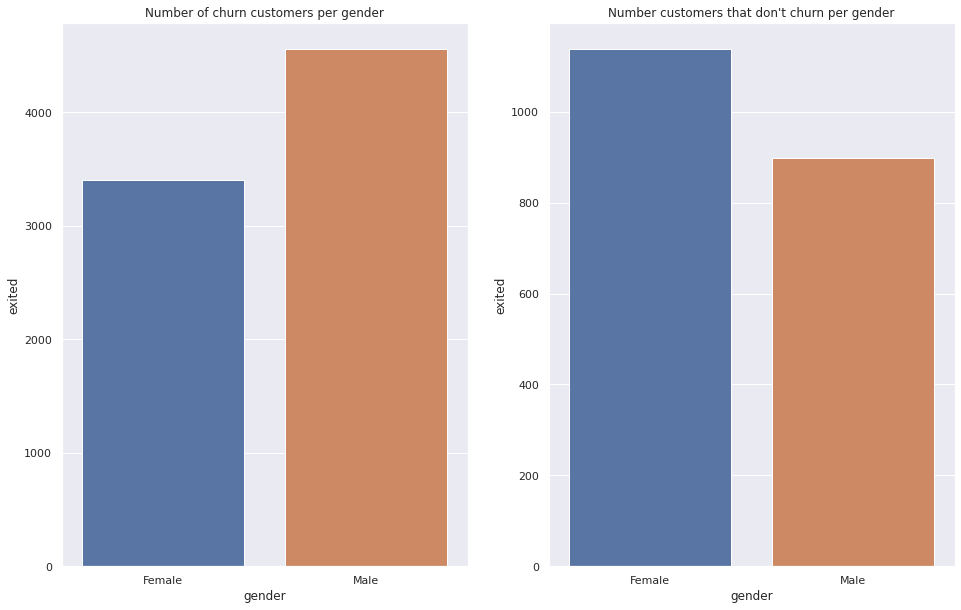

In [106]:
# Number of churn customers per gender
churn_per_gender = aux1[['gender', 'exited']].groupby('gender').count().reset_index()
plt.figure( figsize=(16,10) )
plt.subplot(1,2,1)
sb.barplot(x='gender',y='exited', data=churn_per_gender);
plt.title('Number of churn customers per gender');

# Number customers that don't churn per gender
dont_churn_per_gender = aux2[['gender', 'exited']].groupby('gender').count().reset_index()
plt.subplot(1,2,2)
sb.barplot(x='gender',y='exited', data=dont_churn_per_gender);
plt.title("Number customers that don't churn per gender");